In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['font.size'] = 14

In [4]:
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

In [5]:
drinks.describe()

,beer,spirit,wine,liters
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [6]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country      193 non-null object
beer         193 non-null int64
spirit       193 non-null int64
wine         193 non-null int64
liters       193 non-null float64
continent    193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [7]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [8]:
drinks1 = drinks.copy()
drinks1.set_index(drinks['country'], inplace =True)
del drinks1['country']
del drinks1.index.name
drinks1.head()

,beer,spirit,wine,liters,continent
Afghanistan,0,0,0,0.0,AS
Albania,89,132,54,4.9,EU
Algeria,25,0,14,0.7,AF
Andorra,245,138,312,12.4,EU
Angola,217,57,45,5.9,AF


## Line Plot

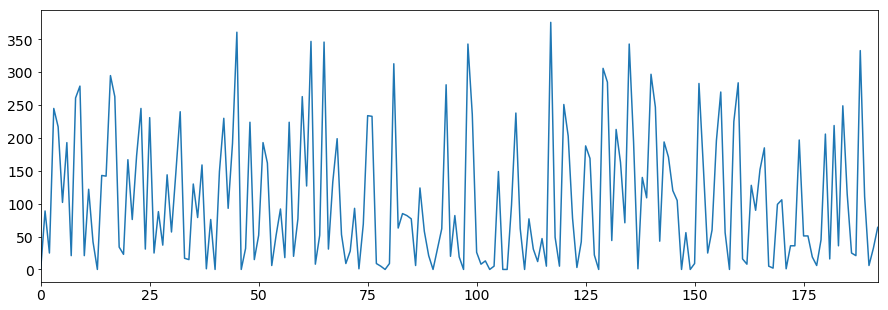

In [10]:
drinks['beer'].plot();

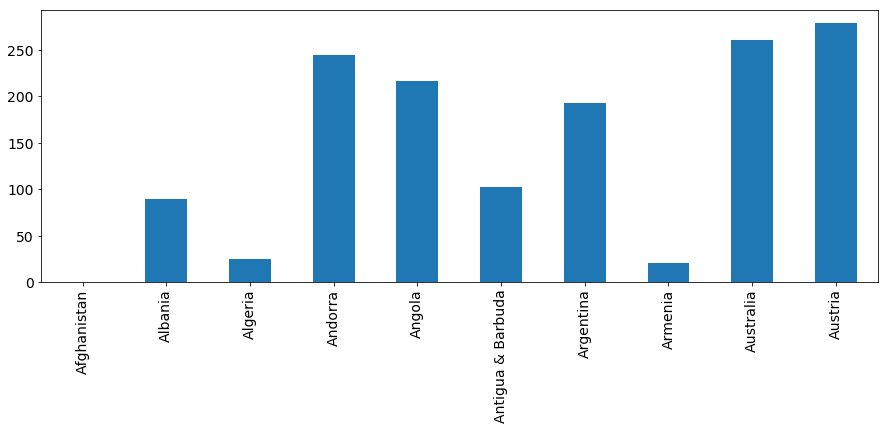

In [11]:
drinks1['beer'][:10].plot(kind='bar')

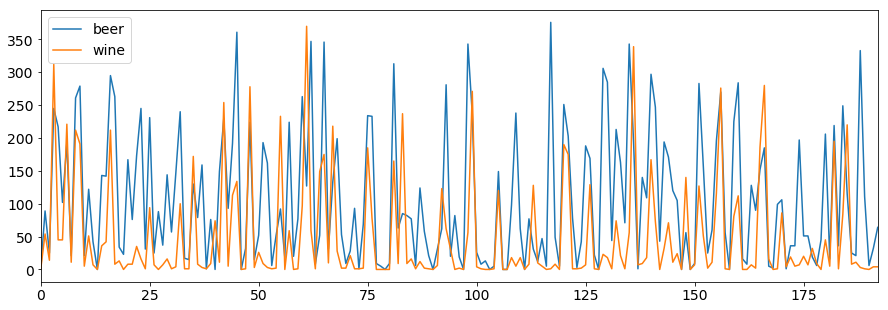

In [12]:
drinks[['beer','wine']].plot()

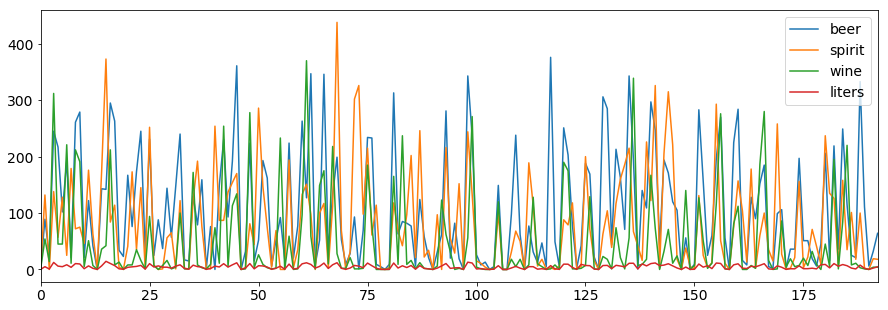

In [13]:
drinks.plot()

In [14]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

In [15]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [16]:
# count the number of ufo reports each year (and sort by year)
ufo.Year.value_counts().sort_index(ascending=False).head()

2014    5382
2013    7003
2012    7263
2011    5089
2010    4154
Name: Year, dtype: int64

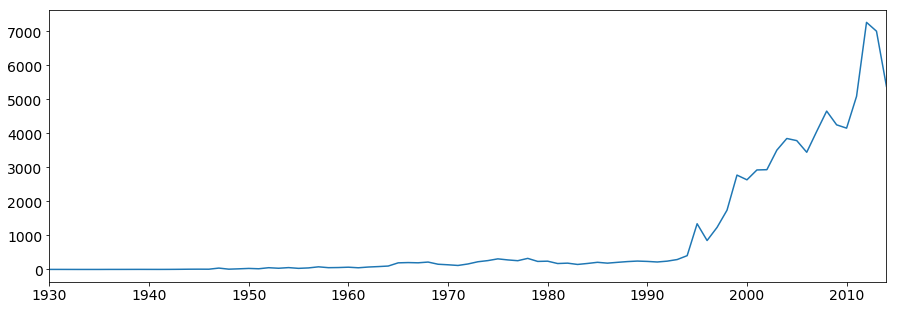

In [17]:
# compare with line plot
ufo.Year.value_counts().sort_index().plot()

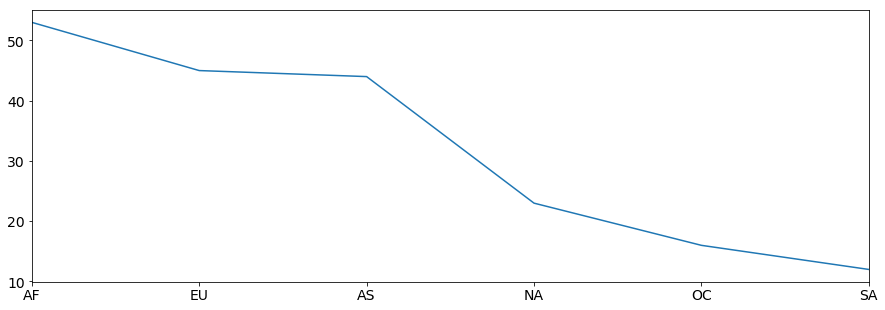

In [18]:
drinks.continent.value_counts().plot()

## Histogram

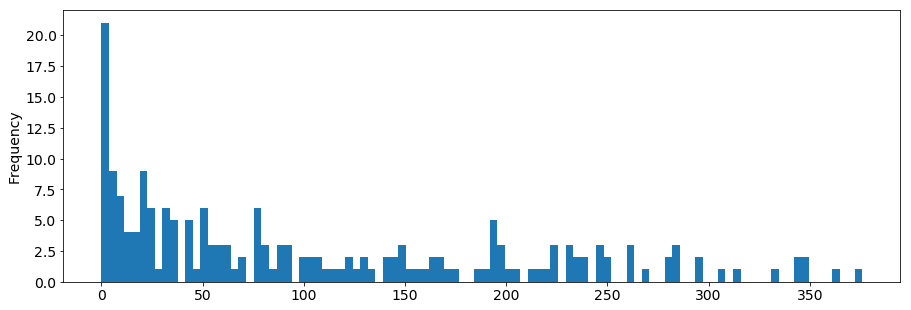

In [19]:
drinks.beer.plot(kind='hist', bins = 100)

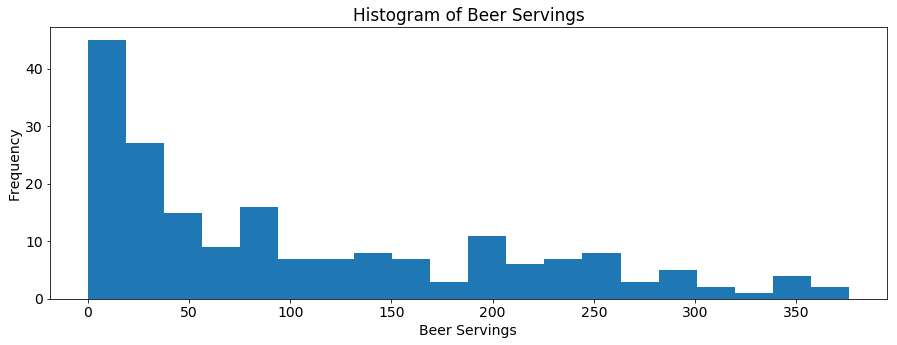

In [20]:
drinks.beer.plot(kind='hist', bins=20)
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.title('Histogram of Beer Servings')
plt.savefig('histo.png')

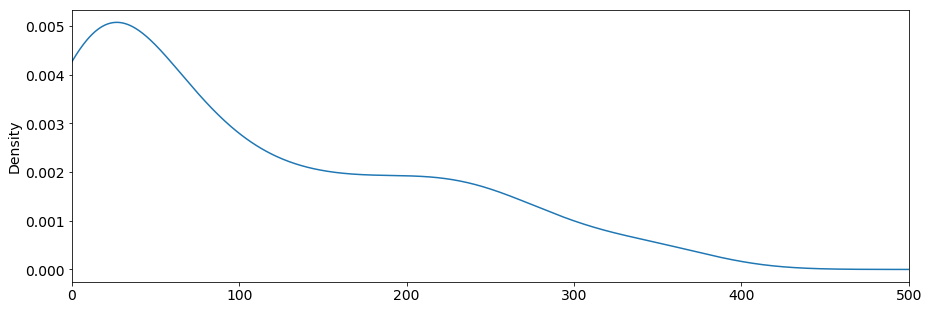

In [21]:
# compare with density plot (smooth version of a histogram)
drinks.beer.plot(kind='density', xlim=(0, 500))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A208E0780>,
      dtype=object)

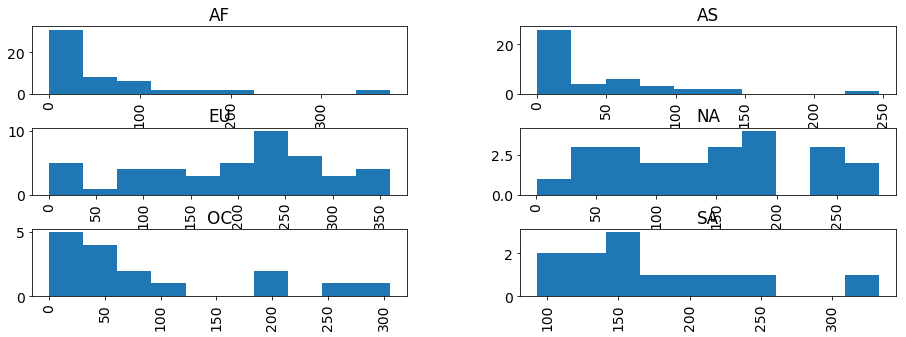

In [22]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent')

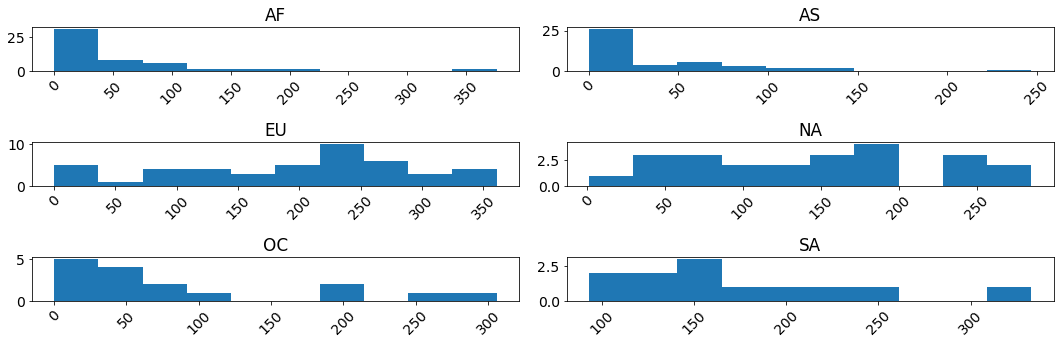

In [31]:
# share the x axes
drinks.hist(column='beer', by='continent', sharex=False, rot=45)
plt.tight_layout()


## Scatter Plot

In [24]:
drinks[['beer', 'wine']].sort_values('beer').head()

,beer,wine
0,0,0
40,0,74
79,0,0
90,0,0
97,0,0


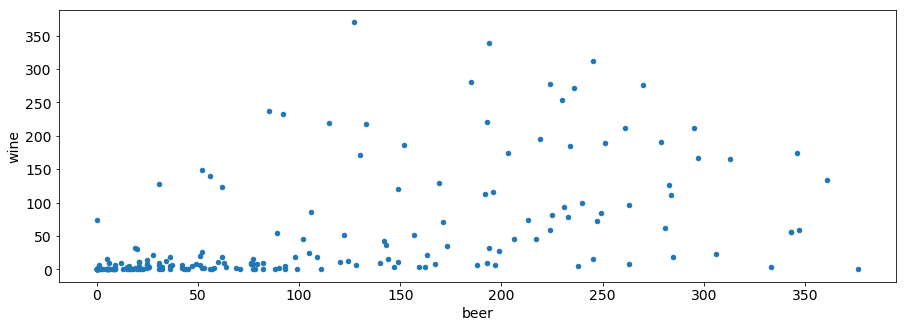

In [25]:
drinks.plot(kind='scatter', x='beer', y='wine')

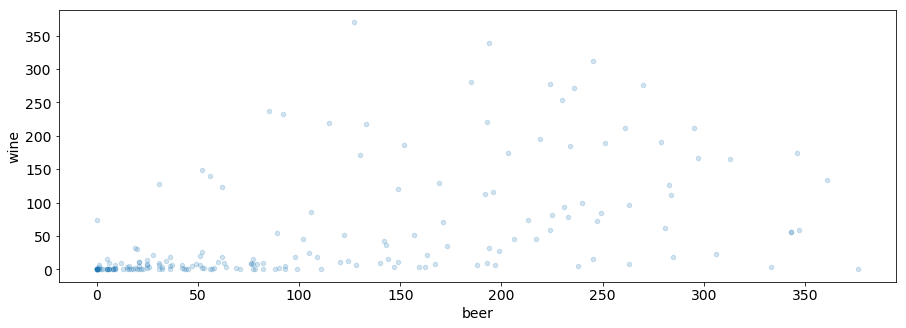

In [26]:
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.2)

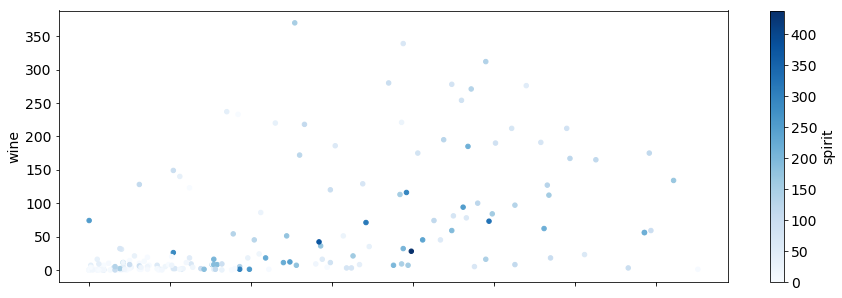

In [32]:
# vary point color by spirit servings
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues')

## Scatter-Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A21367E48>,
      dtype=object)

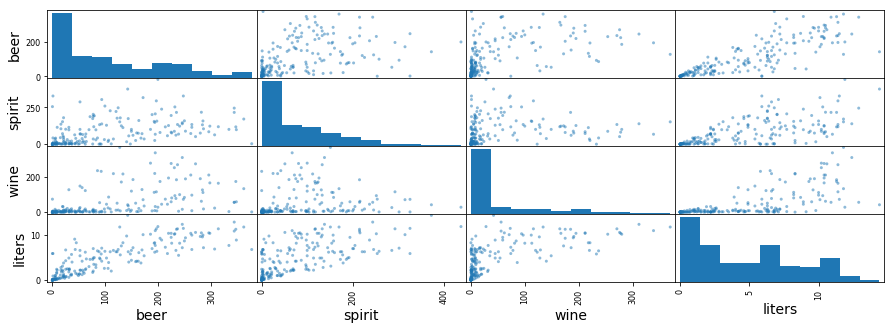

In [33]:
pd.plotting.scatter_matrix(drinks)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A21367DA0>,
      dtype=object)

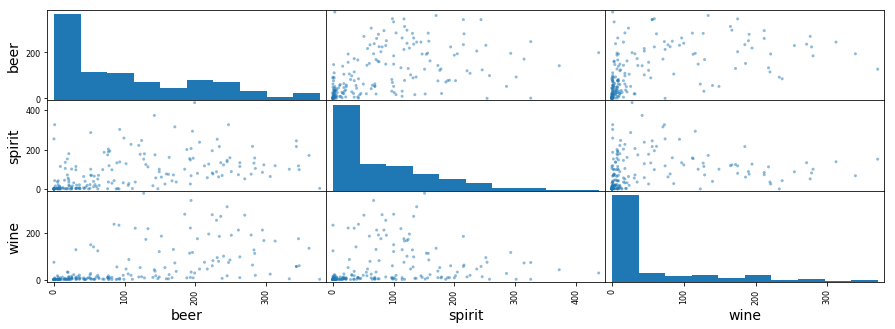

In [34]:
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A245B9668>,
      dtype=object)

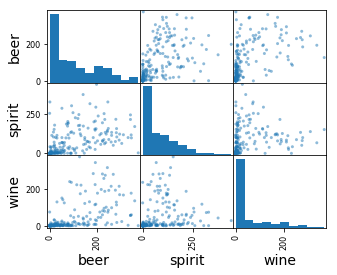

In [35]:
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(5, 4))

## Bar Plot

In [36]:
drinks.head(3)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


In [37]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [38]:
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


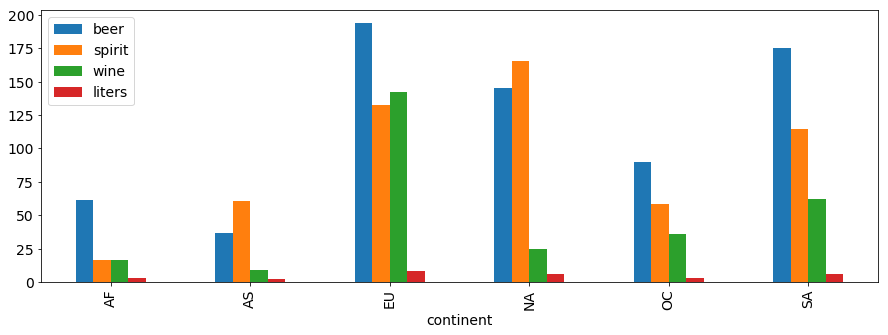

In [39]:
# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar')

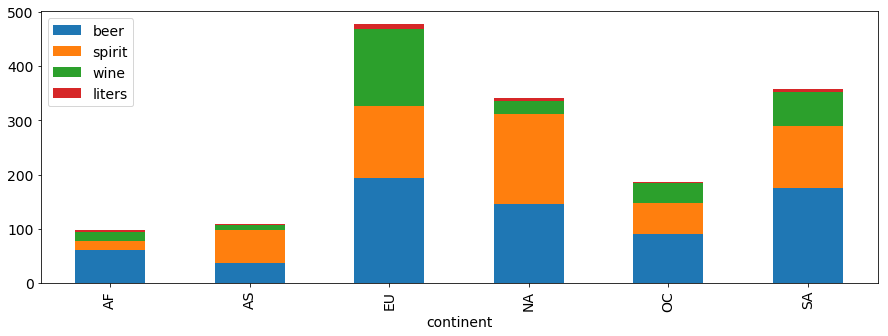

In [40]:
# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar', stacked=True)

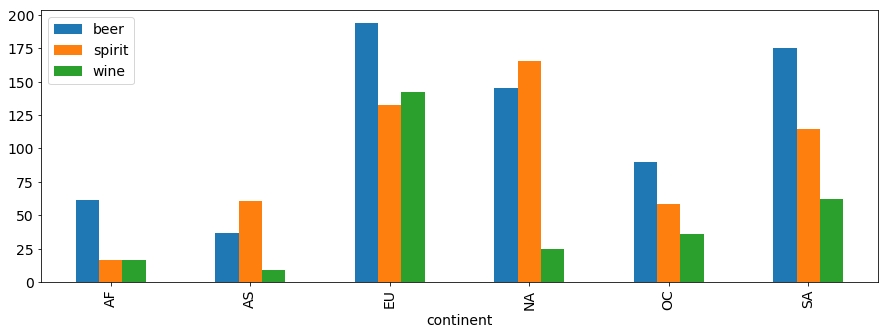

In [41]:
# drop the liters column
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar')

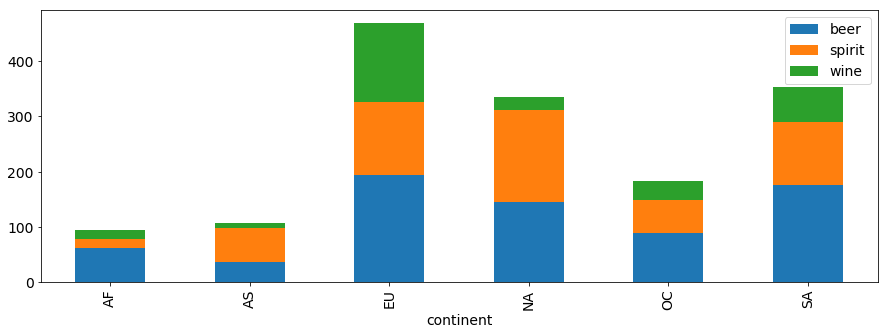

In [42]:
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True)

In [43]:
drinks.spirit.sort_values().head()

0      0
27     0
128    0
118    0
111    0
Name: spirit, dtype: int64

In [44]:
drinks.head(3)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


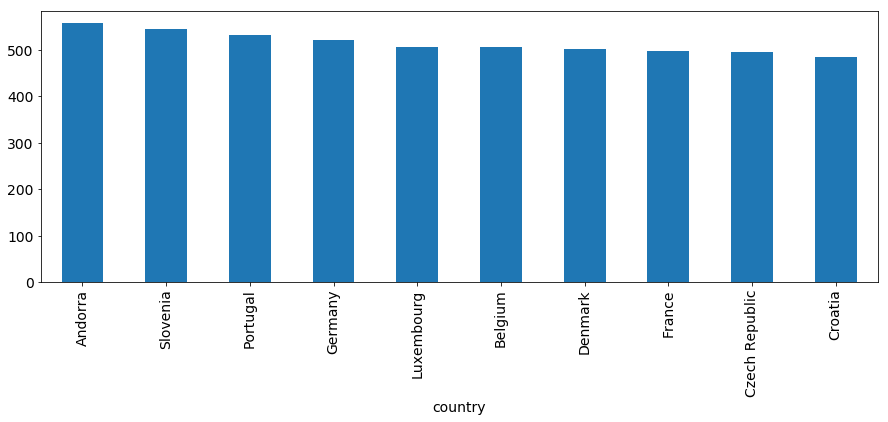

In [45]:
drink_country = drinks[['beer', 'wine']].sum(axis=1)
drink_country.index=drinks.country
drink_country10 = drink_country.sort_values(ascending=False)[:10]
drink_country10.plot(kind='bar')

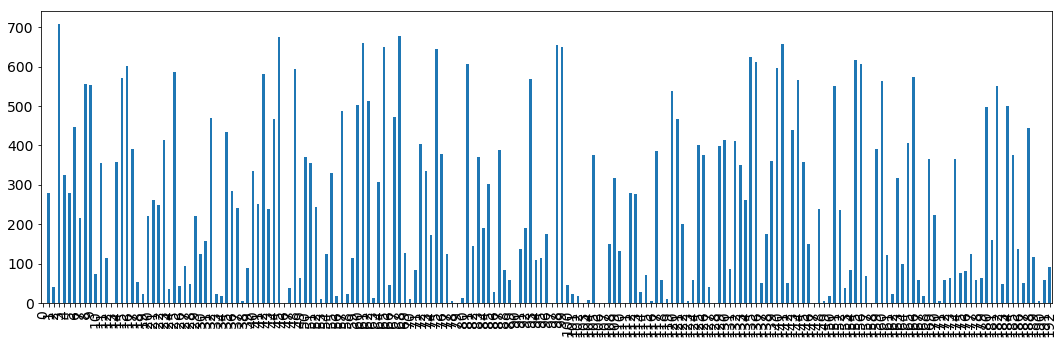

In [50]:
drinks.sum(axis=1).plot(kind='bar')
plt.tight_layout()

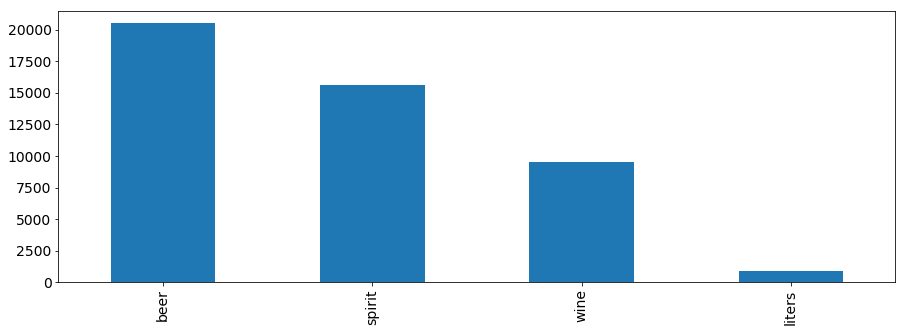

In [47]:
drinks[['beer','spirit','wine','liters']].sum(axis=0).plot(kind='bar')

## Box-Plot

In [48]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


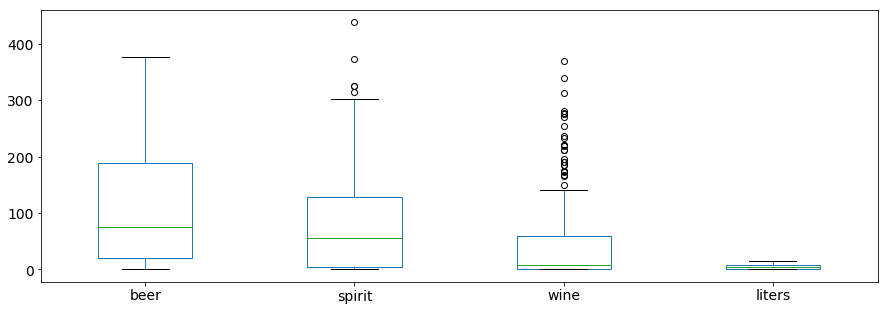

In [49]:
drinks.plot(kind='box')

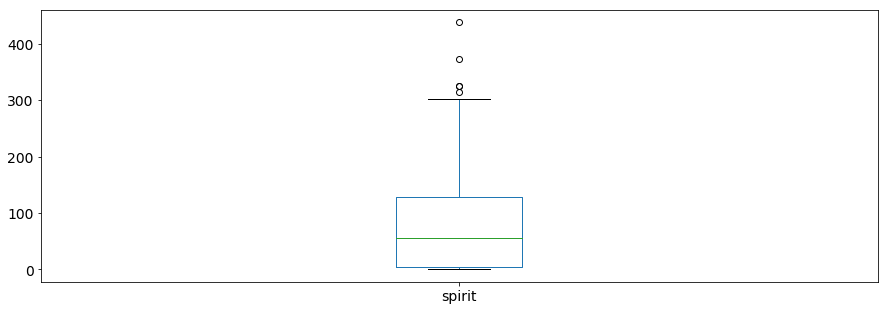

In [51]:
drinks.spirit.plot(kind='box')

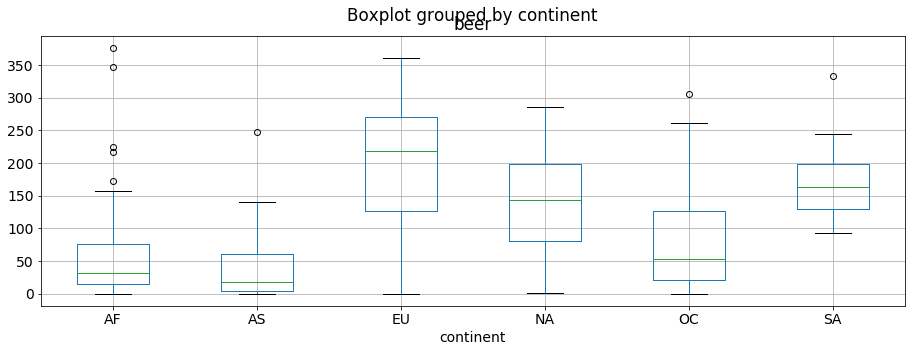

In [53]:
# box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent')

In [54]:
# box plot of beer servings grouped by continent
drinks.groupby('continent').mean().T

continent,AF,AS,EU,NA,OC,SA
beer,61.471698,37.045455,193.777778,145.434783,89.68750,175.083333
spirit,16.339623,60.840909,132.555556,165.739130,58.43750,114.750000
wine,16.264151,9.068182,142.222222,24.521739,35.62500,62.416667
liters,3.007547,2.170455,8.617778,5.995652,3.38125,6.308333


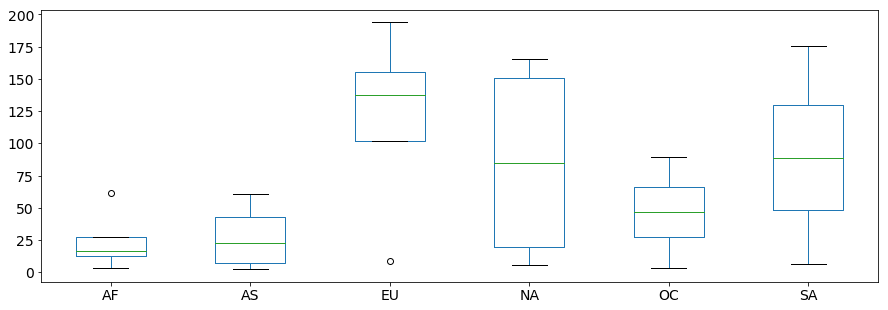

In [55]:
# box plot of beer servings grouped by continent
drinks.groupby('continent').mean().T.plot(kind='box')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A25D70EF0>,
      dtype=object)

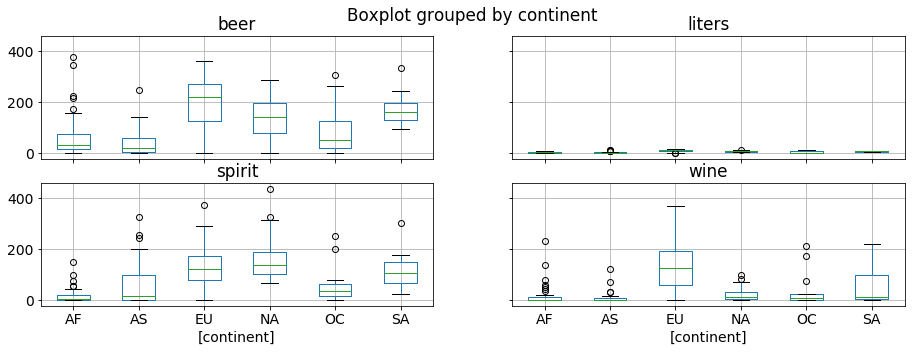

In [56]:
# box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent')

## Saving Plot

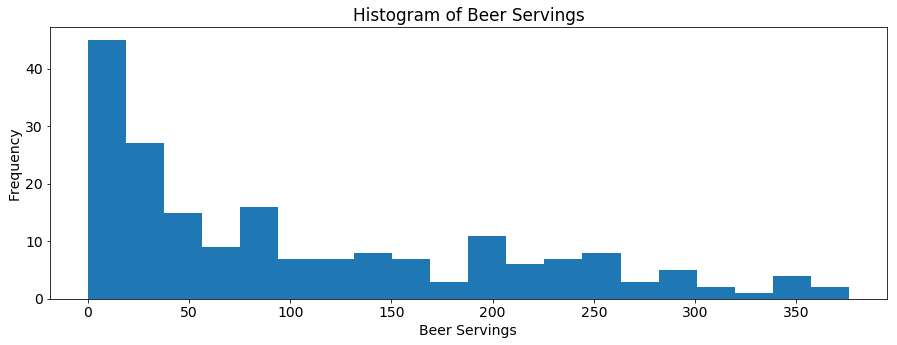

In [57]:
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram_original.png')

## Seaborn

In [58]:
import seaborn as sns

In [59]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


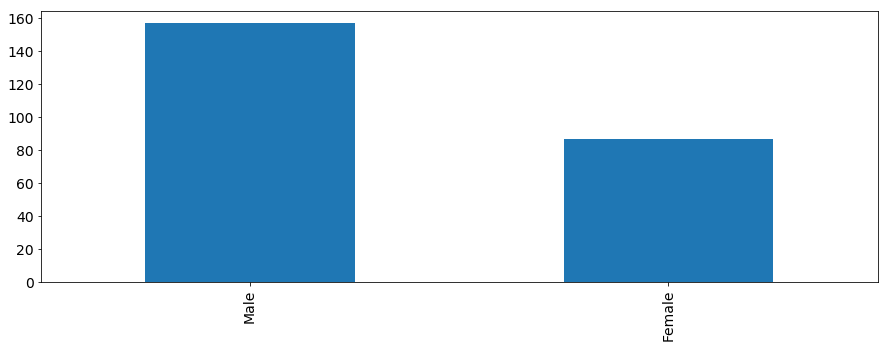

In [60]:
tips_df['sex'].value_counts().plot(kind='bar')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


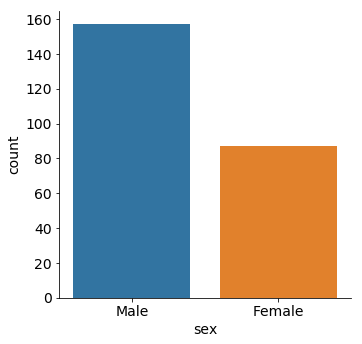

In [61]:
# fatorplot
sns.factorplot('sex', data=tips_df, kind='count')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


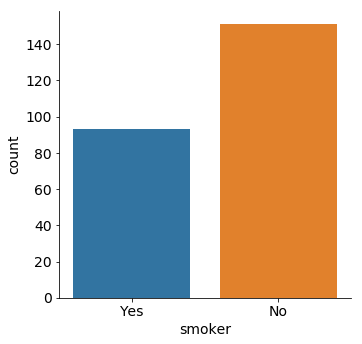

In [62]:
sns.factorplot('smoker', data=tips_df, kind='count')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


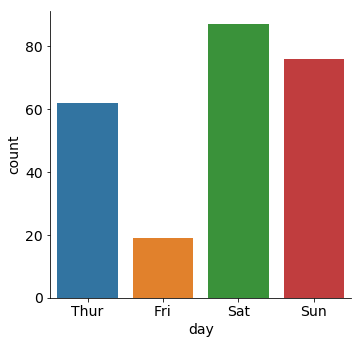

In [63]:
sns.factorplot('day', data=tips_df, kind='count')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


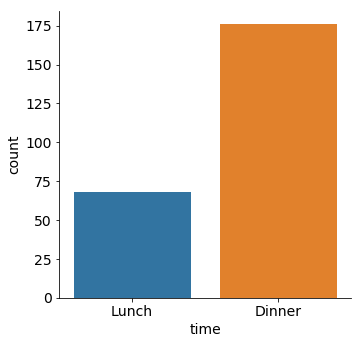

In [64]:
sns.factorplot('time', data=tips_df, kind='count')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


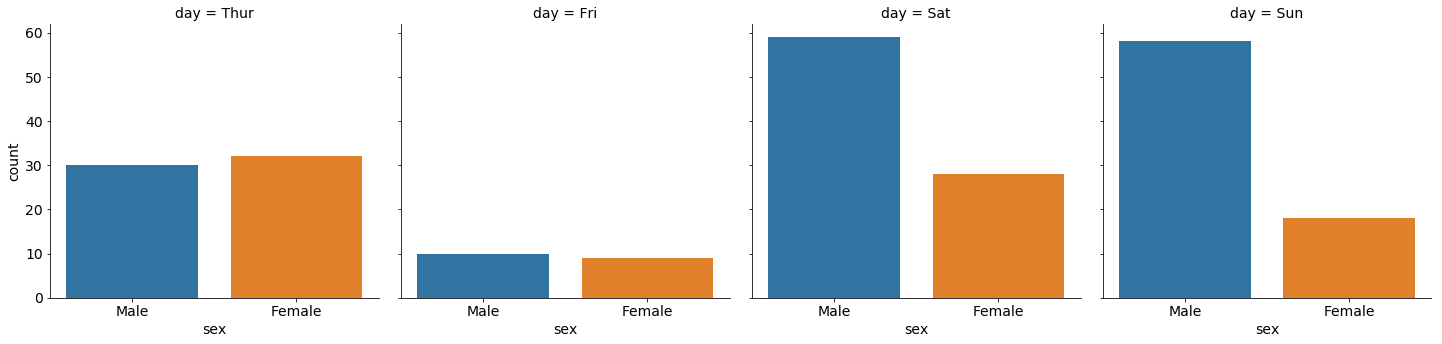

In [65]:
sns.factorplot(x='sex', data=tips_df, kind='count', col='day')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


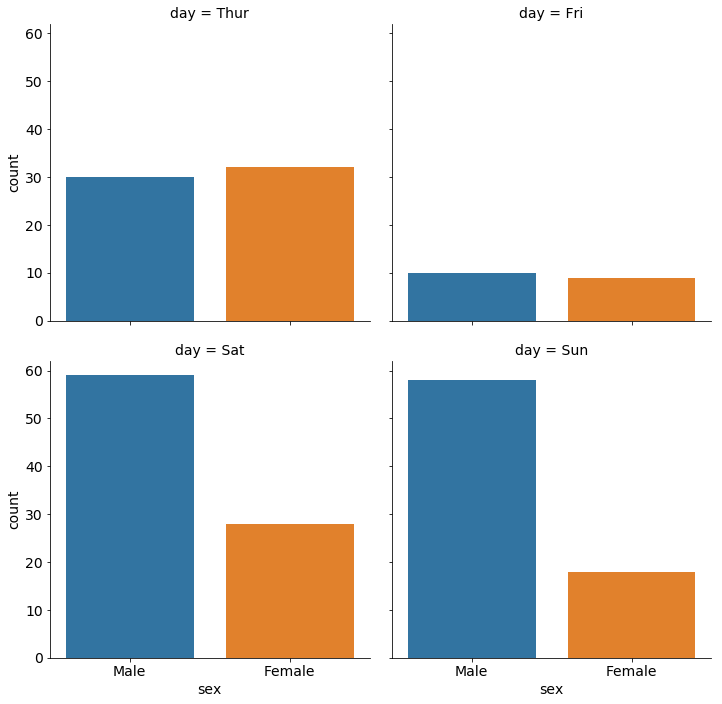

In [66]:
sns.factorplot(x='sex', data=tips_df, kind='count', col='day', col_wrap=2)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(

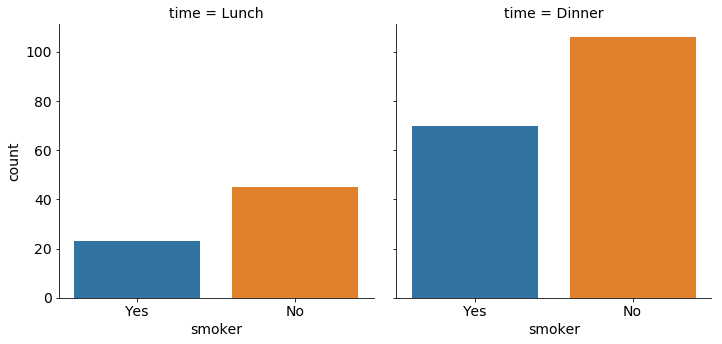

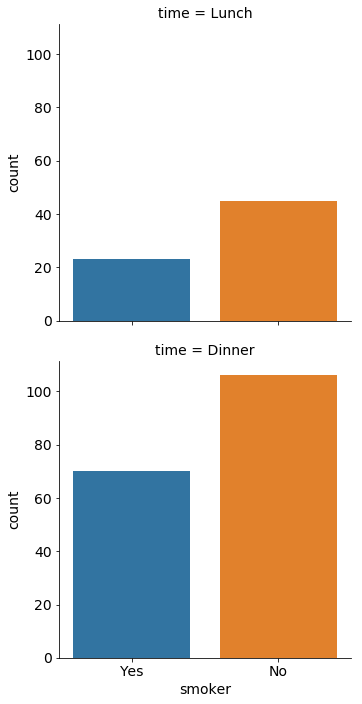

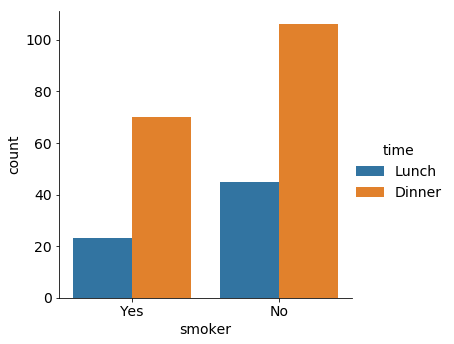

In [67]:
sns.factorplot(x='smoker', data=tips_df, kind='count', col='time')
sns.factorplot(x='smoker', data=tips_df, kind='count', row='time')
sns.factorplot(x='smoker', data=tips_df, kind='count', hue='time')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


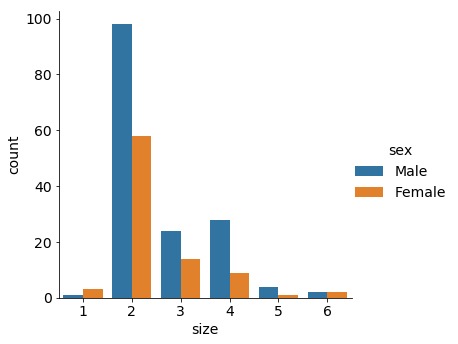

In [68]:
sns.factorplot('size', data=tips_df, kind='count', hue='sex', order=[1,2,3,4,5,6])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


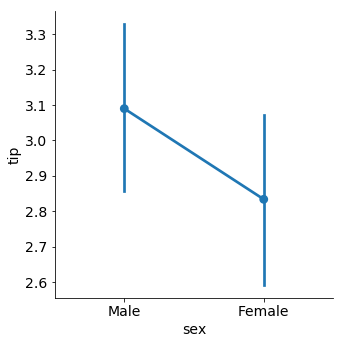

In [69]:
sns.factorplot(x="sex", y="tip", data=tips_df)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


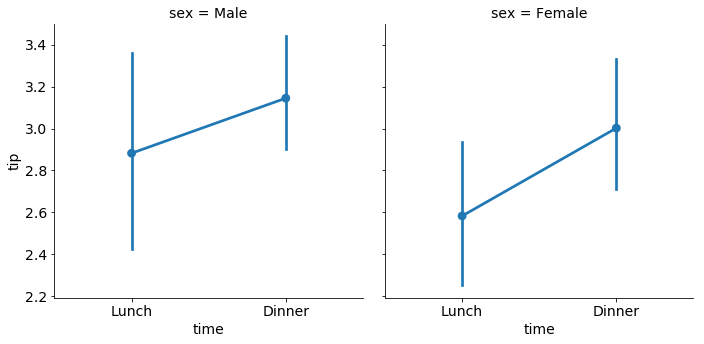

In [70]:
sns.factorplot(x="time", y="tip", data=tips_df, col='sex')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


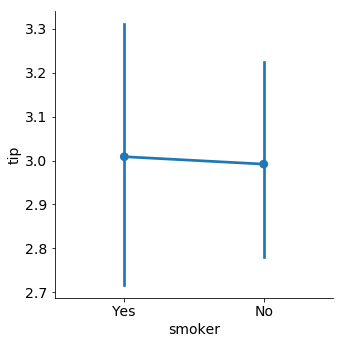

In [71]:
sns.factorplot(x="smoker", y="tip", data=tips_df)

1

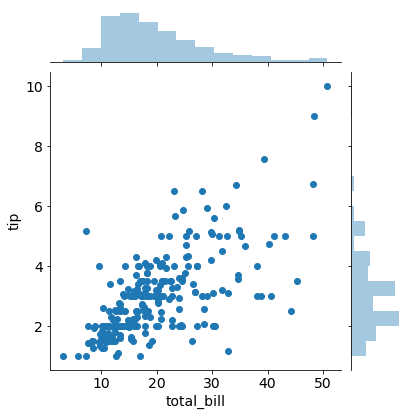

In [72]:
sns.jointplot(tips_df['total_bill'],tips_df['tip'])
1

In [73]:
sns.load_dataset('titanic').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [78]:
pwd

'C:\\Users\\user\\project\\05-23'

In [79]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2EFF-FCB0

 C:\Users\user\project\05-23 디렉터리

2019-05-23  오후 01:42    <DIR>          .
2019-05-23  오후 01:42    <DIR>          ..
2019-05-23  오전 10:06    <DIR>          .ipynb_checkpoints
2019-05-23  오전 11:28            15,827 beer_histogram_original.png
2019-05-23  오전 11:12            15,827 histo.png
2019-05-23  오후 01:42         1,228,231 Pandas_plot.ipynb
               3개 파일           1,259,885 바이트
               3개 디렉터리  404,800,659,456 바이트 남음


In [80]:
import pandas as pd
from pandas import Series, DataFrame

In [82]:
titanic_df = pd.read_csv("titanic_data.csv")

In [83]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [85]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [88]:
# Who
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
titanic_data = df

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


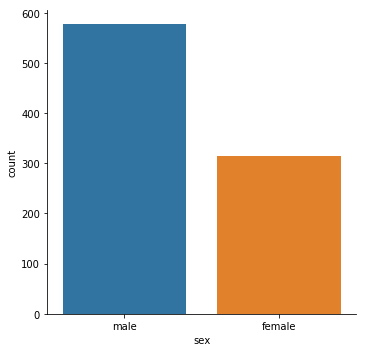

In [90]:
sns.factorplot('sex', data=titanic_data, kind = 'count')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


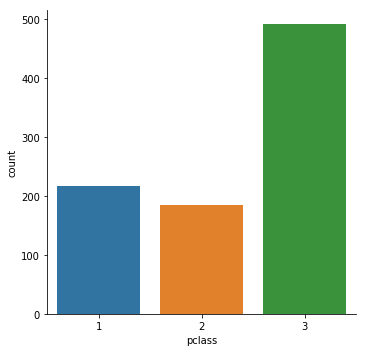

In [91]:
sns.factorplot('pclass', data=titanic_data, kind='count', order=[1,2,3])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


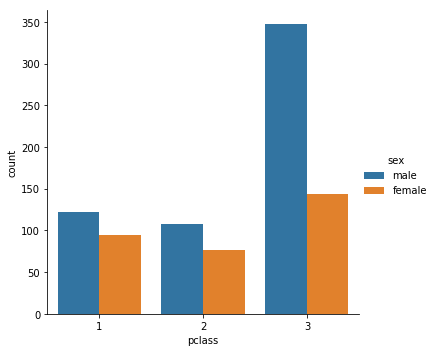

In [92]:
sns.factorplot('pclass', data=titanic_data, kind='count', hue='sex', order=[1,2,3])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


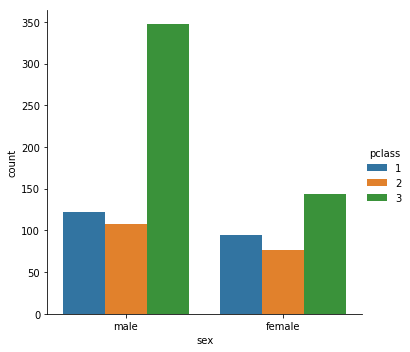

In [93]:
sns.factorplot('sex', data=titanic_data, kind='count', hue='pclass', hue_order=[1,2,3])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


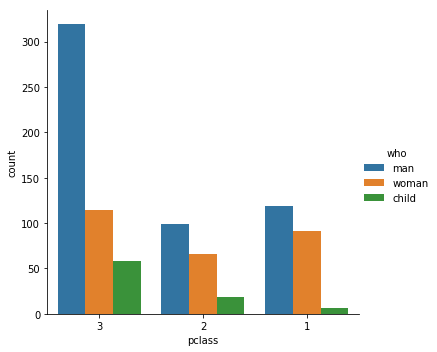

In [94]:
sns.factorplot('pclass', data=titanic_data, kind='count', hue='who', order=[3,2,1])

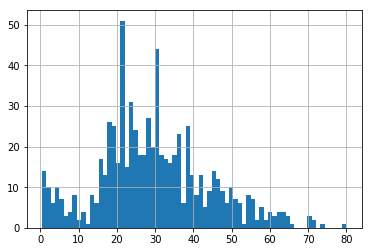

In [95]:
titanic_data['age'].hist(bins=70)

In [96]:
#From Where
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [97]:
cabin_df = DataFrame(titanic_data['deck'].dropna())

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


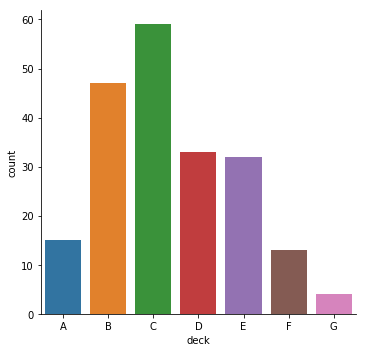

In [98]:
sns.factorplot('deck', data=cabin_df, kind='count')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


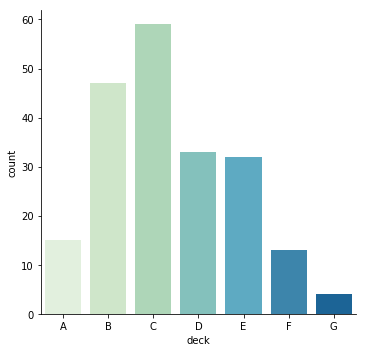

In [99]:
sns.factorplot('deck', data=cabin_df, kind='count', \
palette='GnBu', order=list('ABCDEFG'))

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


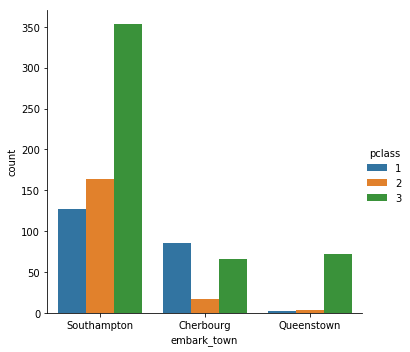

In [100]:
sns.factorplot('embark_town', data=titanic_data, hue='pclass', hue_order=[1,2,3], kind='count')

In [101]:
#alone
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


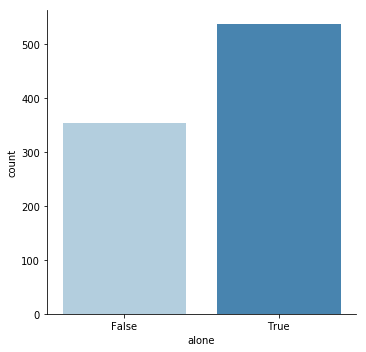

In [102]:
sns.factorplot('alone', data=titanic_data, palette='Blues', kind='count')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


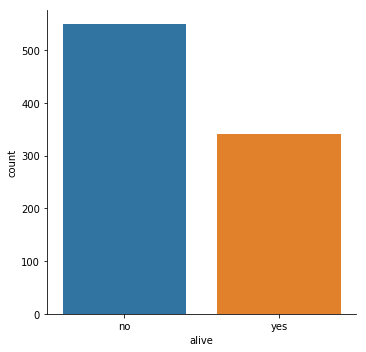

In [104]:
# survived
# map column
titanic_data['alive'] = titanic_data.survived.map({0: "no", 1:"yes"})
sns.factorplot('alive', data=titanic_data, kind='count')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


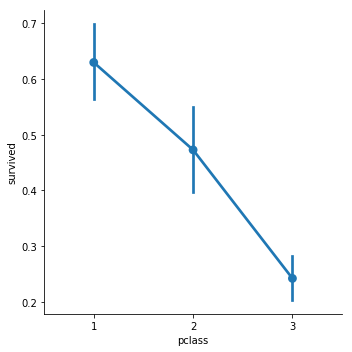

In [105]:
sns.factorplot('pclass', 'survived', data=titanic_data, order=[1,2,3])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


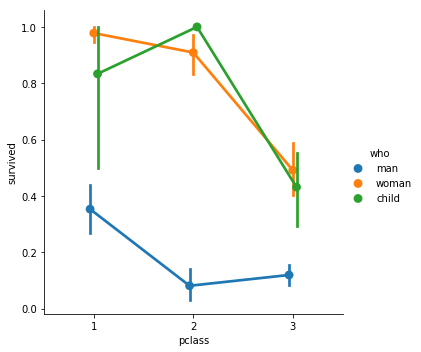

In [106]:
sns.factorplot('pclass', 'survived', hue='who', \
               data=titanic_data, order=[1,2,3], dodge=True)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


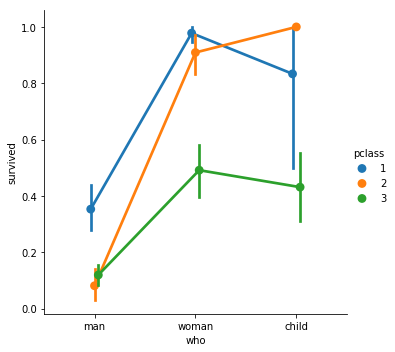

In [107]:
sns.factorplot('who', 'survived', hue='pclass', \
data=titanic_data, dodge=True, hue_order=[1,2,3])

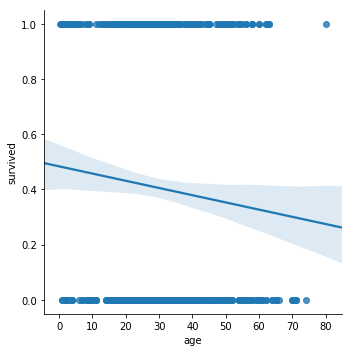

In [108]:
sns.lmplot('age','survived',data=titanic_data)

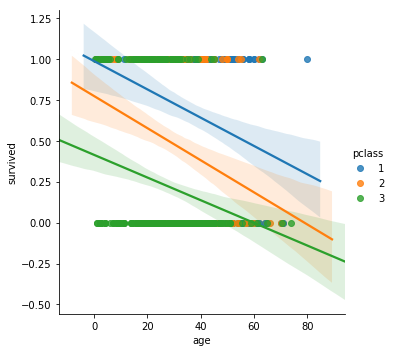

In [109]:
sns.lmplot('age','survived', hue='pclass', \
data=titanic_data, hue_order=[1,2,3])

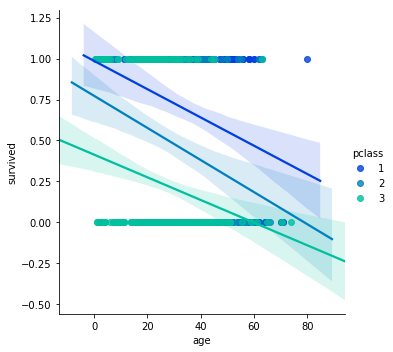

In [110]:
# grouping..
generations=[10,20,40,60,80]
sns.lmplot('age','survived',hue='pclass',\
data=titanic_data,palette='winter',\
hue_order=[1,2,3])

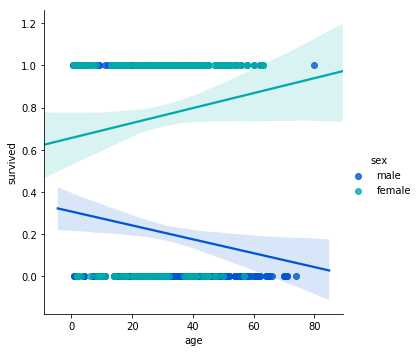

In [111]:
sns.lmplot('age','survived', hue='sex', \
data=titanic_data, palette='winter')